In [1]:
# Title: Feature Engineering for Classification
# Description: Create a new feature that could help distinguish between species based on
# logical assumptions and verify its utility.

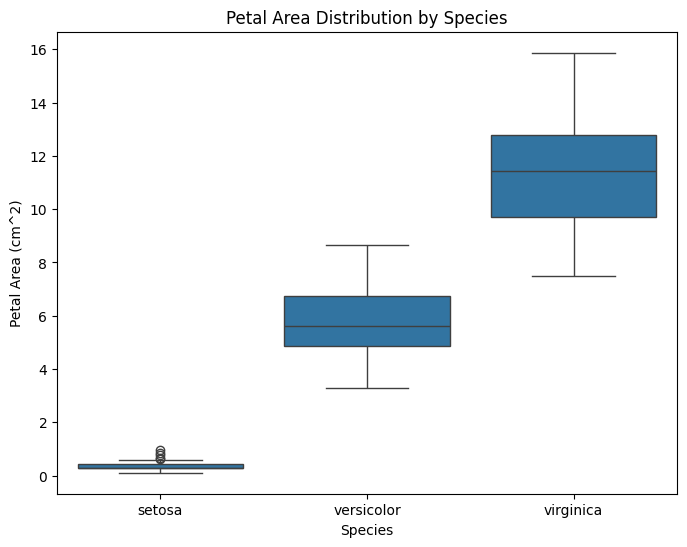

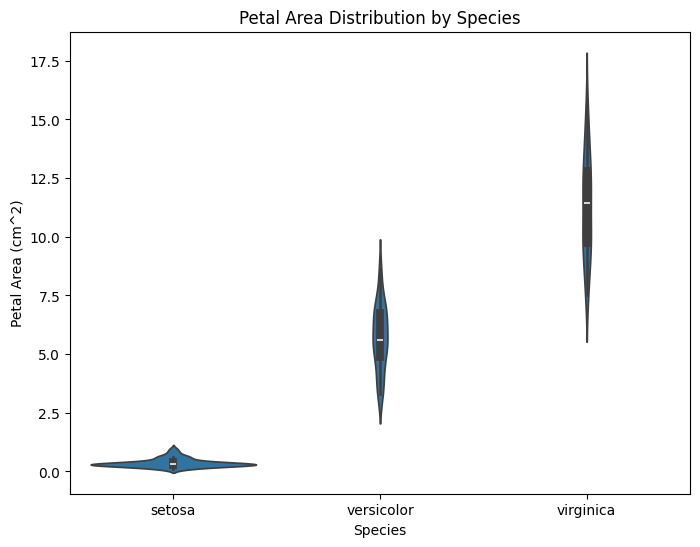

Descriptive statistics of Petal Area per Species:
            count     mean       std   min     25%     50%    75%    max
species                                                                 
setosa       50.0   0.3656  0.181155  0.11  0.2800   0.300   0.42   0.96
versicolor   50.0   5.7204  1.368403  3.30  4.8600   5.615   6.75   8.64
virginica    50.0  11.2962  2.157412  7.50  9.7175  11.445  12.79  15.87




ValueError: could not convert string to float: 'setosa'

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# 1. Create a new feature: 'petal_area'
# Assumption: The area of the petal (length * width) might be a good discriminator.
iris['petal_area'] = iris['petal_length'] * iris['petal_width']

# 2. Visualize the distribution of the new feature by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal_area', data=iris)
plt.title('Petal Area Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Area (cm^2)')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='petal_area', data=iris)
plt.title('Petal Area Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Area (cm^2)')
plt.show()

# 3. Check the descriptive statistics of the new feature per species
print("Descriptive statistics of Petal Area per Species:")
print(iris.groupby('species')['petal_area'].describe())
print("\n" + "="*50 + "\n")

# 4. Explore the correlation of the new feature with the original features
correlation_with_petal_area = iris.corr()['petal_area'].sort_values(ascending=False)
print("Correlation of Petal Area with other features:")
print(correlation_with_petal_area)
print("\n" + "="*50 + "\n")

# 5. Visualize the relationship of the new feature with other features using scatter plots (faceted by species)
sns.FacetGrid(iris, col='species', hue='species', height=4) \
   .map(plt.scatter, 'petal_length', 'petal_area') \
   .add_legend()
plt.suptitle('Petal Length vs. Petal Area by Species', y=1.02)
plt.show()

sns.FacetGrid(iris, col='species', hue='species', height=4) \
   .map(plt.scatter, 'petal_width', 'petal_area') \
   .add_legend()
plt.suptitle('Petal Width vs. Petal Area by Species', y=1.02)
plt.show()

# Further verification (optional): Train a simple classification model with and without the new feature
# to see if it improves performance. This is beyond the scope of basic exploration but is the ultimate
# way to verify the utility of a new feature for a specific task.